<a href="https://colab.research.google.com/github/sahanirambukpitiya/Sales-Volume-Prediction/blob/main/Solution_174128V.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import python libraries
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, mean_absolute_error
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.metrics import r2_score
from keras.optimizers import SGD

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
data_set = pd.read_csv('/content/gdrive/MyDrive/ANN/Data/Google_Stock_Price.csv', thousands=',')
data_set.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,7380500
1,1/4/2012,331.27,333.87,329.08,666.45,5749400
2,1/5/2012,329.83,330.75,326.89,657.21,6590300
3,1/6/2012,328.34,328.77,323.68,648.24,5405900
4,1/9/2012,322.04,322.29,309.46,620.76,11688800


In [ ]:
data_set.shape

(1258, 6)

In [ ]:
data_set.describe()

,Open,High,Low,Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,533.709833,537.880223,529.007409,712.669666,3.158107e+06
std,151.904442,153.008811,150.552807,164.752591,2.273726e+06
min,279.120000,281.210000,277.220000,491.200000,7.900000e+03
25%,404.115000,406.765000,401.765000,576.740000,1.621700e+06
50%,537.470000,540.750000,532.990000,695.675000,2.566150e+06
75%,654.922500,662.587500,644.800000,782.105000,4.122500e+06
max,816.680000,816.680000,805.140000,1216.830000,2.497790e+07


In [ ]:
data_set.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object

In [ ]:
df = pd.DataFrame(data_set, columns=data_set.columns)
df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,7380500
1,1/4/2012,331.27,333.87,329.08,666.45,5749400
2,1/5/2012,329.83,330.75,326.89,657.21,6590300
3,1/6/2012,328.34,328.77,323.68,648.24,5405900
4,1/9/2012,322.04,322.29,309.46,620.76,11688800


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   float64
 5   Volume  1258 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 59.1+ KB


In [ ]:
# Check whether any missing values are available
df.isnull().values.any()

False

In [ ]:
df.nunique()

Date      1258
Open      1215
High      1219
Low       1223
Close     1241
Volume    1240
dtype: int64

In [ ]:
df.duplicated().values.any()

False

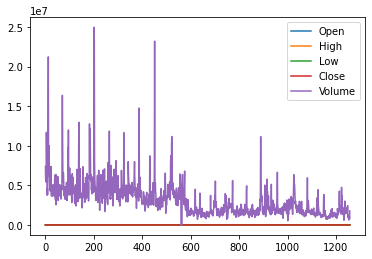

In [ ]:
df.plot.line()

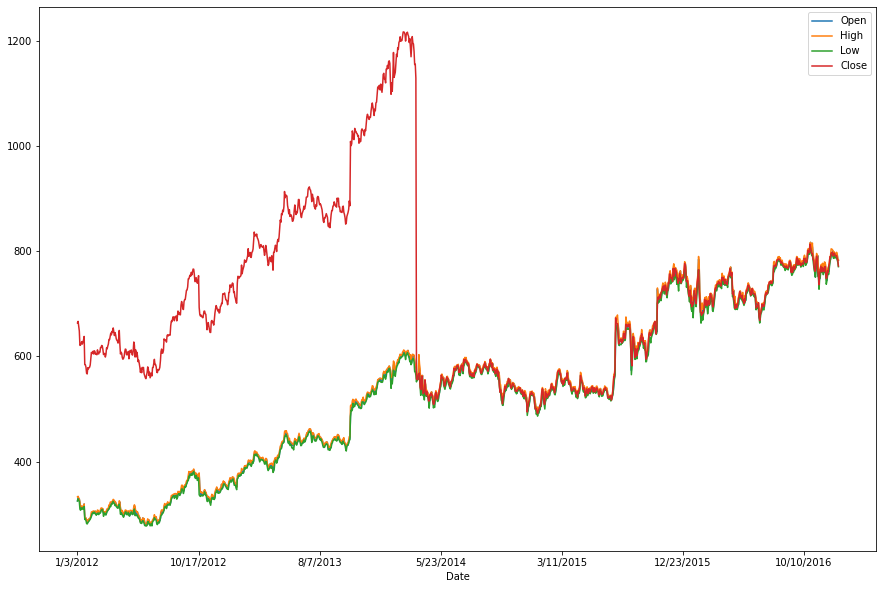

In [ ]:
df.plot(x='Date',y=[ 'Open', 'High', 'Low', 'Close'],kind='line',figsize=(15,8))

In [ ]:
columns = df.columns
print(columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')


In [ ]:
# number of data points where close is greater than high value
len(df[df[columns[4]] >df[columns[2]]])

560

In [ ]:
# drop close column
df = df.drop('Close', axis=1)

In [ ]:
df.shape

(1258, 5)

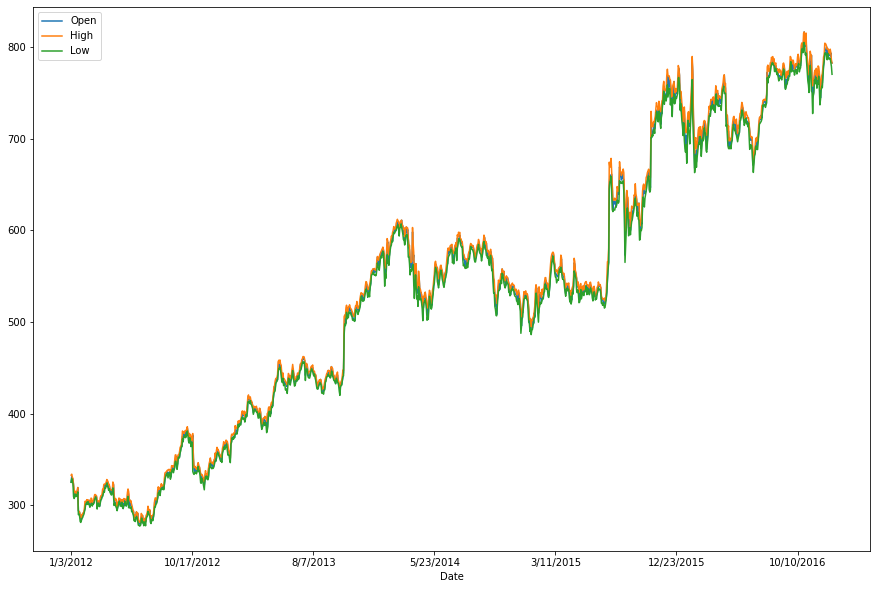

In [ ]:
df.plot(x='Date',y=[ 'Open', 'High', 'Low'],kind='line',figsize=(15,10))

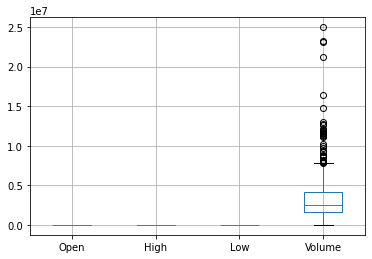

In [ ]:
df.boxplot()

In [ ]:
columns = df.columns
print(columns)

Index(['Date', 'Open', 'High', 'Low', 'Volume'], dtype='object')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f54cea668d0>,
      dtype=object)

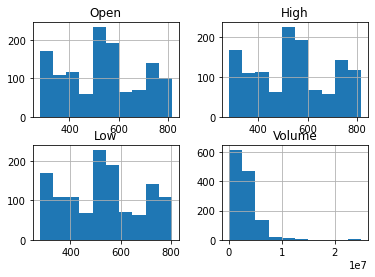

In [ ]:
df.hist()

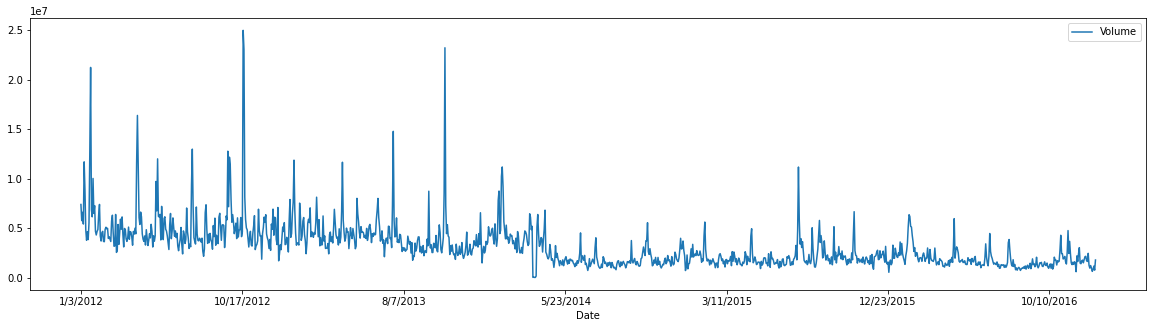

In [ ]:
# plot a graph for volume against the date
df.plot(x="Date", y="Volume", figsize=(20,5))

In [ ]:
df = df.drop('Date', axis=1)
df.shape

(1258, 4)

In [ ]:
columns = df.columns
print(columns)

Index(['Open', 'High', 'Low', 'Volume'], dtype='object')


In [ ]:
#Applying Standardization 
#step 1 - Calling the standard scaler
scaler = StandardScaler() 

#Transformation of other features
scaler.fit(df)
df_scaled = scaler.transform(df)

df_scaled = pd.DataFrame(df_scaled, columns=columns)
df_scaled.head(10)

,Open,High,Low,Volume
0,-1.372855,-1.340653,-1.355794,1.857776
1,-1.333209,-1.333854,-1.328483,1.140122
2,-1.342692,-1.354253,-1.343036,1.510102
3,-1.352505,-1.367198,-1.364366,0.988988
4,-1.393995,-1.409566,-1.458855,3.753349
5,-1.448920,-1.452521,-1.473208,2.492889
6,-1.469401,-1.466905,-1.459254,0.730235
7,-1.444112,-1.455529,-1.441446,0.266758
8,-1.460379,-1.474882,-1.459453,0.648398
9,-1.441610,-1.458471,-1.444170,0.296853


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f54d5ac9790>,
      dtype=object)

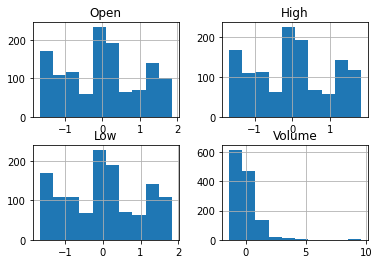

In [ ]:
df_scaled.hist()

,Open,High,Low,Volume
Open,1.000000,0.999692,0.999498,-0.530506
High,0.999692,1.000000,0.999480,-0.526936
Low,0.999498,0.999480,1.000000,-0.538273
Volume,-0.530506,-0.526936,-0.538273,1.000000


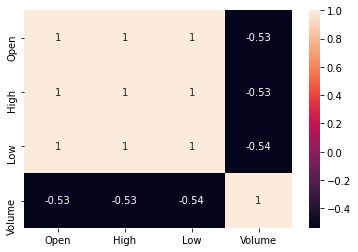

In [ ]:
# correlation matrix
correlation_matrix = df_scaled.corr()
sns.heatmap(correlation_matrix,annot=True)
correlation_matrix

In [ ]:
print(df_scaled.shape)

(1258, 4)


In [ ]:
# apply the PCA for feature reduction
pca = PCA(.95)
pca.fit(df_scaled)
print(pca.n_components_)
pca.explained_variance_ratio_.sum()

2


0.9998019554881998

In [ ]:
pca.explained_variance_ratio_

array([0.83973194, 0.16007002])

In [ ]:
X_pca = pca.transform(df_scaled)

DF = pd.DataFrame(data =X_pca)
DF

,0,1
0,2.864283,0.875757
1,2.563529,0.222695
2,2.722021,0.557933
3,2.556158,0.063388
4,3.657767,2.601167
...,...,...
1253,-3.135708,0.027020
1254,-3.127751,0.102398
1255,-3.051361,0.244966
1256,-3.035720,0.045168


In [ ]:
# split a univariate sequence into samples
def split_seq_multi(sequence, n_past, n_future):
    
    x, y = [], [] 
    for window_start in range(len(sequence)):
        past_end = window_start + n_past
        future_end = past_end + n_future
        if future_end > len(sequence):
            break
        # slicing the past and future parts of the window
        past   = sequence[window_start:past_end, :]
        future = sequence[past_end:future_end, -1]
        x.append(past)
        y.append(future)
    
    return np.array(x), np.array(y)

In [ ]:
# specify the window size
n_steps = 70
# split into samples
X, y = split_seq_multi(DF.to_numpy(), n_steps,1)

In [ ]:
X.shape

(1188, 70, 2)

In [ ]:
# Split the data

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2,random_state=101)


In [ ]:
print("X_train shape:",X_train.shape,"    y_train shape:",Y_train.shape)
print("X_test shape:",X_test.shape,"     y_test shape:", Y_test.shape)

X_train shape: (950, 70, 2)     y_train shape: (950, 1)
X_test shape: (238, 70, 2)      y_test shape: (238, 1)


In [ ]:
# define RNN model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_steps,2)))  
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(1))


In [ ]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 100)               41200     
_________________________________________________________________
dense_48 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_49 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_50 (Dense)             (None, 30)                1530      
_________________________________________________________________
dense_51 (Dense)             (None, 1)                 31        
Total params: 50,361
Trainable params: 50,361
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
# fit the model
history = model.fit(X_train, Y_train, epochs=100, batch_size=32, verbose=2, validation_data=(X_test, Y_test))

Epoch 1/100
30/30 - 3s - loss: 0.4133 - mae: 0.4125 - val_loss: 0.8283 - val_mae: 0.4053
Epoch 2/100
30/30 - 1s - loss: 0.3557 - mae: 0.3415 - val_loss: 0.7626 - val_mae: 0.4299
Epoch 3/100
30/30 - 1s - loss: 0.3407 - mae: 0.3375 - val_loss: 0.7138 - val_mae: 0.3879
Epoch 4/100
30/30 - 1s - loss: 0.3341 - mae: 0.3411 - val_loss: 0.6937 - val_mae: 0.3831
Epoch 5/100
30/30 - 1s - loss: 0.3324 - mae: 0.3378 - val_loss: 0.7192 - val_mae: 0.3827
Epoch 6/100
30/30 - 1s - loss: 0.3248 - mae: 0.3389 - val_loss: 0.6811 - val_mae: 0.3728
Epoch 7/100
30/30 - 1s - loss: 0.3139 - mae: 0.3232 - val_loss: 0.6311 - val_mae: 0.3713
Epoch 8/100
30/30 - 1s - loss: 0.3110 - mae: 0.3235 - val_loss: 0.6256 - val_mae: 0.3874
Epoch 9/100
30/30 - 1s - loss: 0.3082 - mae: 0.3170 - val_loss: 0.6322 - val_mae: 0.3749
Epoch 10/100
30/30 - 1s - loss: 0.3086 - mae: 0.3198 - val_loss: 0.6056 - val_mae: 0.3807
Epoch 11/100
30/30 - 1s - loss: 0.3021 - mae: 0.3192 - val_loss: 0.6278 - val_mae: 0.3570
Epoch 12/100
30/30 

In [ ]:
# evaluate the model
mse, mae = model.evaluate(X_test, Y_test, verbose=0)
print('MSE: %.3f, RMSE: %.3f, MAE: %.3f' % (mse, np.sqrt(mse), mae))

MSE: 0.620, RMSE: 0.787, MAE: 0.363


In [ ]:
# y train value prediction
y_train_pred = model.predict(X_train)

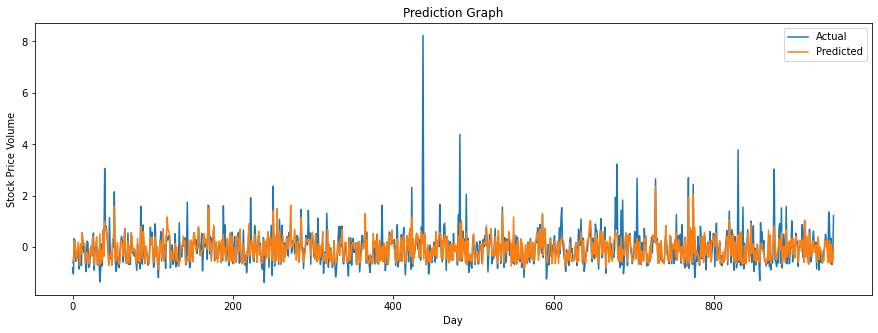

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(Y_train)
plt.plot(y_train_pred)
plt.xlabel('Day')
plt.ylabel('Stock Price Volume')
plt.title('Prediction Graph')
plt.legend(['Actual','Predicted'],loc = 'upper right')
plt.show()

In [ ]:
print('R2 Score: ', r2_score(Y_train, y_train_pred))

R2 Score:  0.4643992472925511


In [ ]:
# predicting y_test values
print(X_test.shape)
y_pred = model.predict(X_test)

(238, 70, 2)


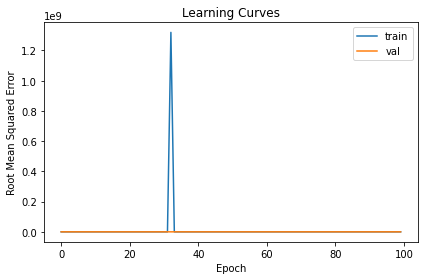

In [ ]:
# plot learning curves
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Root Mean Squared Error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.tight_layout()
plt.show()

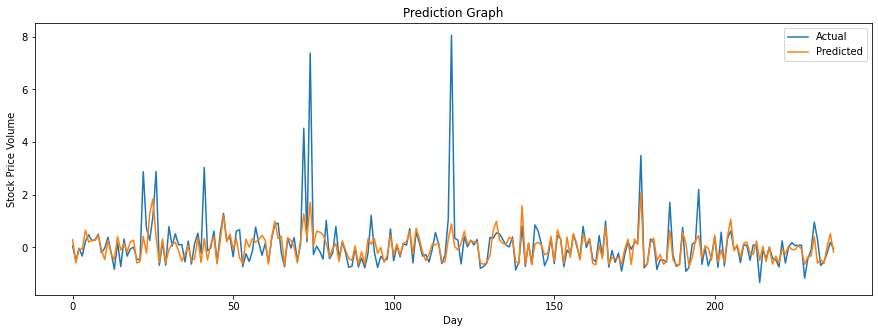

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(Y_test)
plt.plot(y_pred)
plt.xlabel('Day')
plt.ylabel('Stock Price Volume')
plt.title('Prediction Graph')
plt.legend(['Actual','Predicted'],loc = 'upper right')
plt.show()

In [ ]:
print('R2 Score: ', r2_score(Y_test, y_pred))

R2 Score:  0.39185328823106436
